In [1]:
import numpy as np
import pandas as pd #for loading csv Excel files
import itertools #to merge lists
from scipy.interpolate import interp1d
from scipy.optimize import leastsq, curve_fit #for fitting
import matplotlib.pyplot as pl #for plots
from matplotlib import rc, rcParams
from scipy.special import kn #Modified Bessel function of the second kind of integer order n
import scipy.integrate as integrate #for (numerical) integrating

# Options for plotting

In [2]:
fontsize=26
legendfontsize=22
font = {'size' : fontsize}
rc('font',**font)
rc('text', usetex=True)
rc('font', family='serif', serif='Computer Modern Roman')

In [3]:
#Color palette accessible to colorblind people (see https://davidmathlogic.com/colorblind/)
lightblue='#1A85FF'
blue='#005AB5'
darkblue='#222255'
purple='#5D3A9B'
magenta='#AA4499'
red='#DC3220'
orange='#E66100'
yellow='#FFC20A'
green='#40B0A6'

colors=[lightblue,blue,darkblue,purple,magenta,red,orange,yellow,green]

# Constants

In [4]:
hbar=1.

# Approximate analytical solution for deltal

In [5]:
def deltalappr(potential,alphaX,mX,mphi,l,v):
    if potential=='attractive':
        prefactor=+1.
    elif potential=='repulsive':
        prefactor=-1.
    k=(mX/2.)*v
    r0=l/k
    deltalappr=(-1.)*prefactor*alphaX*(mX/hbar**2)*(kn(0.,mphi*r0)/k)
    return deltalappr

# Numerical solution for deltal

In [105]:
#_____Yukawa potential_____
def U(potential,alphaX,mphi,r):
    if potential=='attractive':
        prefactor=+1.
    elif potential=='repulsive':
        prefactor=-1.
    U=prefactor*(alphaX/r)*np.exp(-mphi*r)
    return U

In [376]:
def deltal(potential,alphaX,mX,mphi,l,v):
    #_____Relations_____
    m=(mX/2.)  #reduced mass m
    k=m*v #momentum k
    E=(hbar**2.*k**2.)/(2.*m) #kinetic energy
    #_____deltal integral_____
    #def integrand(r):
    #    return -(mX/hbar**2)*(U(potential,alphaX,mphi,r)/np.sqrt(k**2.-((l+1./2.)**2./r**2.)))
    #def integrand(r):
    #    return (1./hbar)*np.sqrt(hbar**2.*k**2.-2.*m*U(potential,alphaX,mphi,r)-(hbar**2.*(l+1./2.)**2.)/r**2.)-k
    def integrand(r):
        x=1.-(r0**2./r**2)
        #x=k**2.-((l+1./2.)**2./r**2.)
        y=U(potential,alphaX,mphi,r)/E
        #y=2*m*U(potential,alphaX,mphi,r)
        #print([x,y])
        #print([np.sqrt(x-y),np.sqrt(x)])
        #return np.sqrt(x-y)-np.sqrt(x)
        #print([np.sqrt(1-y/x),1.])
        return np.sqrt(x)*(np.sqrt(1-y/x)-1.)
    r0=l/k
    rmax=10**4.*r0 #Value cannot be smaller than this for l=1. Otherwise r0>rmax.
    logging=False
    if logging:
        print([r0,rmax])
        pl.xscale('log')
        #pl.yscale('log') 
        Rvals=np.logspace(np.log10(r0),np.log10(rmax),50)
        pl.plot(Rvals,[integrand(r) for r in Rvals])
        pl.show()
        pl.xscale('log')
        #pl.yscale('log')
        pl.plot(Rvals,[U(potential,alphaX,mphi,r) for r in Rvals])
        pl.show()
    #deltal=integrate.quad(integrand,r0,rmax,limit=200)[0] #,limit=200
    #deltalintegral=integrate.quad(integrand,r0,rmax,limit=500,points=r0)[0] #,limit=200
    #deltal=deltalintegral+(1./2.)*np.pi*(l+(1./2.))-k*r0
    #print([deltalintegral,(1./2.)*np.pi*(l+(1./2.))-k*r0])
    deltalintegral=integrate.quad(integrand,r0,rmax,limit=200)[0] #,limit=200
    deltal=k*deltalintegral
    return deltal

potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
l=1
v=10
print(deltal(potential,alphaX,mX,mphi,l,v))
print(deltalappr(potential,alphaX,mX,mphi,l,v))

-0.00989614222288215
-0.027862884147252836


C:\Users\Laura Sagunski\Anaconda2\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Laura Sagunski\Anaconda2\lib\site-packages\ipykernel_launcher.py:39: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.


In [377]:
vvals=np.logspace(np.log10(1.),np.log10(10.**4.),100)

C:\Users\Laura Sagunski\Anaconda2\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Laura Sagunski\Anaconda2\lib\site-packages\ipykernel_launcher.py:39: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.



[v,delta,deltaappr]:
[1.0, -0.0977028809343979, -0.23257713961888724]
[1.0974987654930561, -0.08887500189434337, -0.21361100514327505]
[1.2045035402587823, -0.08104053406162286, -0.19617915710854983]
[1.321941148466029, -0.0738920356592174, -0.1801586737507101]
[1.4508287784959397, -0.06737018663886413, -0.16543636469285722]
[1.5922827933410924, -0.06142068244241265, -0.15190801203140783]
[1.7475284000076838, -0.05627946322893733, -0.13947766946127393]
[1.9179102616724888, -0.05127105728833952, -0.12805701511735706]
[2.1049041445120205, -0.04666998698997376, -0.11756475411968119]
[2.3101297000831598, -0.042617935439418345, -0.10792606709850637]
[2.535364493970112, -0.038982834223894015, -0.09907210124510132]
[2.782559402207125, -0.03552662451024899, -0.09093950068472055]
[3.0538555088334154, -0.03237660930059598, -0.08346997320188929]
[3.3516026509388426, -0.02950545633055709, -0.07660989056544128]
[3.6783797718286344, -0.026886968107372466, -0.07030991990291878]
[4.0370172585965545, 


[v,delta,deltaappr]:
[1.0, -0.07023851647610407, -0.14047377601124764]
[1.0974987654930561, -0.06484625542744704, -0.12968984465755626]
[1.2045035402587823, -0.05985766992252418, -0.1197133167416024]
[1.321941148466029, -0.055243212517728214, -0.11048584446135226]
[1.4508287784959397, -0.050976108704904204, -0.10195307490393087]
[1.5922827933410924, -0.04703132134279492, -0.09406440072905546]
[1.7475284000076838, -0.04338415755616171, -0.08677272362428122]
[1.9179102616724888, -0.040012639716796604, -0.08003423022987365]
[2.1049041445120205, -0.03689689117754375, -0.07380818018415049]
[2.3101297000831598, -0.034017437807698135, -0.06805670590386492]
[2.535364493970112, -0.03135642636970326, -0.06274462368710675]
[2.782559402207125, -0.0288973622391384, -0.05783925570694047]
[3.0538555088334154, -0.026624941093992993, -0.05331026245140514]
[3.3516026509388426, -0.024525010313803997, -0.04912948515854013]
[3.6783797718286344, -0.022587171864558366, -0.04527079779287718]
[4.0370172585965

Plots/deltal.pdf exported.


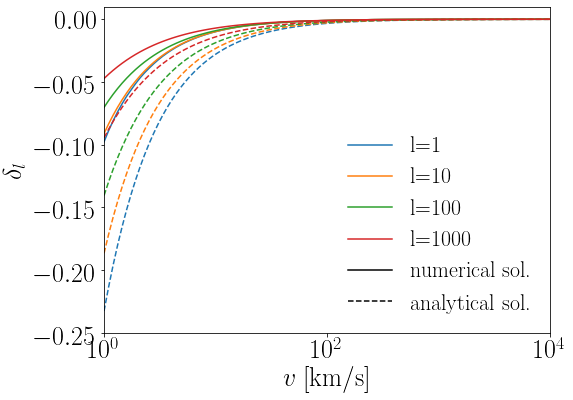

In [378]:
potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
lvals=[1,10,100,1000]

pl.figure(figsize=(8,6))
for i in range(0,len(lvals)):
    l=lvals[i]
    #print('l='+str(l))
    color='C'+str(i)
    deltalvals=np.array([deltal(potential,alphaX,mX,mphi,l,v) for v in vvals])
    print()
    deltalapprvals=np.array([deltalappr(potential,alphaX,mX,mphi,l,v) for v in vvals])
    logging=True
    if logging==True:
        print('[v,delta,deltaappr]:')
        for i in range(0,len(vvals)):
            print([vvals[i],deltalvals[i],deltalapprvals[i]])
    pl.plot(vvals,deltalvals,linestyle='-',label='l='+str(l),color=color) 
    pl.plot(vvals,deltalapprvals,linestyle='--')
    if l==lvals[-1]:
        pl.plot([-10.,-10.],color='black',linestyle='-',label='numerical sol.')
        pl.plot([-1.,-10.],color='black',linestyle='--',label='analytical sol.')


pl.xlim([vvals[0],vvals[-1]])
pl.ylim([-0.25,0.01])
pl.xscale('log')
#pl.yscale('log')    
pl.xlabel(r'$v\;{\rm [km/s]}$',fontsize=fontsize) 
pl.ylabel(r'$\delta_l$',fontsize=fontsize) 
pl.legend(loc='lower right',edgecolor='white',fontsize=legendfontsize)
pl.savefig('Plots/deltal.pdf',bbox_inches='tight')
print('Plots/deltal.pdf exported.')
pl.show()

In [379]:
# potential='attractive' #['attractive','repulsive']:
# alphaX=10.**(-2.)
# mX=200 #GeV
# mphi=10**(-3.) #GeV.
# #lvals=[1,5,10,50,100,1000]
# lvals=[1,10,100,1000]

# pl.figure(figsize=(8,6))
# for i in range(0,len(lvals)):
#     l=lvals[i]
#     #print('l='+str(l))
#     color='C'+str(i)
#     pl.plot(vvals,[deltal(potential,alphaX,mX,mphi,l,v) for v in vvals],linestyle='-',label='l='+str(l),color=color) 
#     pl.plot(vvals,[deltalappr(potential,alphaX,mX,mphi,l,v) for v in vvals],linestyle='--')
#     if l==lvals[-1]:
#         pl.plot([-10.,-10.],color='black',linestyle='-',label='numerical sol.')
#         pl.plot([-1.,-10.],color='black',linestyle='--',label='analytical sol.')


# pl.xlim([10.**2.,vvals[-1]])
# pl.ylim([-0.005,0.01])
# pl.xscale('log')
# #pl.yscale('log')    
# pl.xlabel(r'$v\;{\rm [km/s]}$',fontsize=fontsize) 
# pl.ylabel(r'$\delta_l$',fontsize=fontsize) 
# pl.legend(loc='best',edgecolor='white',fontsize=legendfontsize)    
# pl.show()

C:\Users\Laura Sagunski\Anaconda2\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Laura Sagunski\Anaconda2\lib\site-packages\ipykernel_launcher.py:39: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.


Plots/difference_deltal.pdf exported.


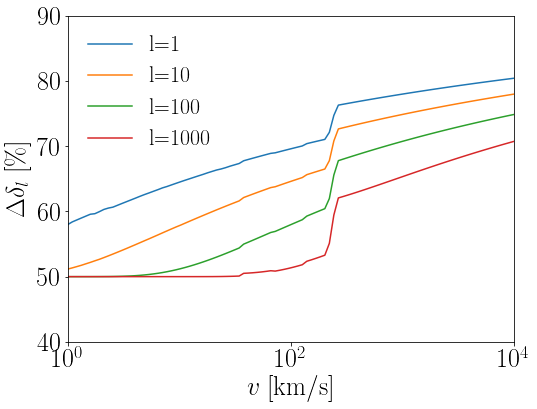

In [380]:
potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
#lvals=[1,5,10,50,100,1000]
lvals=[1,10,100,1000]

pl.figure(figsize=(8,6))
for i in range(0,len(lvals)):
    l=lvals[i]
    color='C'+str(i)
    #pl.plot(vvals,[deltal(potential,alphaX,mX,mphi,l,v) for v in vvals],linestyle='-',label=str(l),color=color) 
    pl.plot(vvals,[100.*((deltalappr(potential,alphaX,mX,mphi,l,v)-deltal(potential,alphaX,mX,mphi,l,v))/deltalappr(potential,alphaX,mX,mphi,l,v)) for v in vvals],linestyle='-',label='l='+str(l),color=color)
    #pl.plot(vvals,[(deltal(potential,alphaX,mX,mphi,l,v)-deltalappr(potential,alphaX,mX,mphi,l,v)) for v in vvals],linestyle='-',label=str(l),color=color)

pl.xlim([vvals[0],vvals[-1]])
pl.ylim([40.,90.])
pl.xscale('log')
#pl.yscale('log')    
pl.xlabel(r'$v\;{\rm [km/s]}$',fontsize=fontsize) 
pl.ylabel(r'$\Delta \delta_l\; [\%]$',fontsize=fontsize) 
pl.legend(loc='best',edgecolor='white',fontsize=legendfontsize) 
pl.savefig('Plots/difference_deltal.pdf',bbox_inches='tight')
print('Plots/difference_deltal.pdf exported.')
pl.show()

In [338]:
# potential='attractive' #['attractive','repulsive']:
# alphaX=10.**(-2.)
# mX=200 #GeV
# mphi=10**(-3.) #GeV.
# lvals=[1,5,10,50,100,1000]

# pl.figure(figsize=(8,6))
# for i in range(0,len(lvals)):
#     l=lvals[i]
#     color='C'+str(i)
#     #pl.plot(vvals,[deltal(potential,alphaX,mX,mphi,l,v) for v in vvals],linestyle='-',label=str(l),color=color) 
#     pl.plot(vvals,[(deltal(potential,alphaX,mX,mphi,l,v)-deltalappr(potential,alphaX,mX,mphi,l,v))/deltalappr(potential,alphaX,mX,mphi,l,v) for v in vvals],linestyle='-',label=str(l),color=color)

# pl.xscale('log')
# #pl.yscale('log')    
# pl.xlabel(r'$v\;{\rm [km/s]}$',fontsize=fontsize) 
# pl.ylabel(r'$\Delta \delta_l$',fontsize=fontsize) 
# pl.legend(title='l',loc='upper right',edgecolor='white',fontsize=legendfontsize)    
# pl.show()

C:\Users\Laura Sagunski\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Laura Sagunski\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  


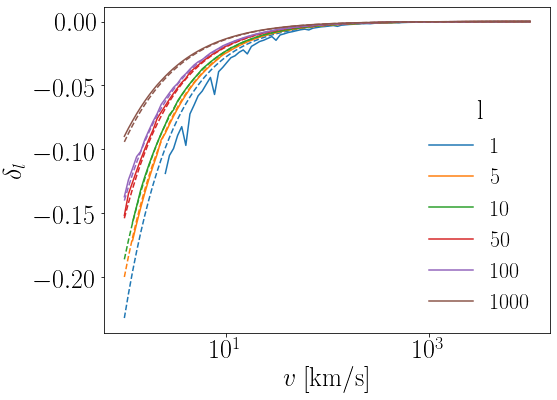

In [62]:
potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
lvals=[1,5,10,50,100,1000]

pl.figure(figsize=(8,6))
for i in range(0,len(lvals)):
    l=lvals[i]
    color='C'+str(i)
    pl.plot(vvals,[deltal(potential,alphaX,mX,mphi,l,v) for v in vvals],linestyle='-',label=str(l),color=color) 
    pl.plot(vvals,[deltalappr(potential,alphaX,mX,mphi,l,v) for v in vvals],linestyle='--')

pl.xscale('log')
#pl.yscale('log')    
pl.xlabel(r'$v\;{\rm [km/s]}$',fontsize=fontsize) 
pl.ylabel(r'$\delta_l$',fontsize=fontsize) 
pl.legend(title='l',loc='lower right',edgecolor='white',fontsize=legendfontsize)    
pl.show()

C:\Users\Laura Sagunski\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Laura Sagunski\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  


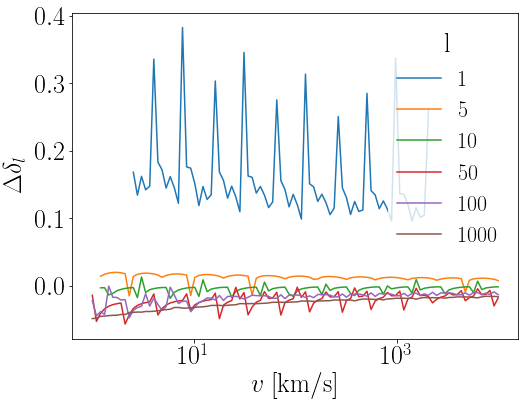

In [75]:
potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
lvals=[1,5,10,50,100,1000]

pl.figure(figsize=(8,6))
for i in range(0,len(lvals)):
    l=lvals[i]
    color='C'+str(i)
    #pl.plot(vvals,[deltal(potential,alphaX,mX,mphi,l,v) for v in vvals],linestyle='-',label=str(l),color=color) 
    pl.plot(vvals,[(deltal(potential,alphaX,mX,mphi,l,v)-deltalappr(potential,alphaX,mX,mphi,l,v))/deltal(potential,alphaX,mX,mphi,l,v) for v in vvals],linestyle='-',label=str(l),color=color)

pl.xscale('log')
#pl.yscale('log')    
pl.xlabel(r'$v\;{\rm [km/s]}$',fontsize=fontsize) 
pl.ylabel(r'$\Delta \delta_l$',fontsize=fontsize) 
pl.legend(title='l',loc='upper right',edgecolor='white',fontsize=legendfontsize)    
pl.show()